In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=64,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=128,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=256,
         activation='relu'
     ),
     tf.keras.layers.Dense(
         units=512,
         activation='relu'
     ),


     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 285,450
Trainable params: 285,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mfcc=model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))

Train...
Epoch 1/120
71/71 [==============================] - 51s 608ms/step - loss: 2.1524 - accuracy: 0.1738 - val_loss: 2.1083 - val_accuracy: 0.2188
Epoch 2/120
71/71 [==============================] - 42s 596ms/step - loss: 2.0076 - accuracy: 0.2467 - val_loss: 2.0661 - val_accuracy: 0.2412
Epoch 3/120
71/71 [==============================] - 52s 734ms/step - loss: 1.9582 - accuracy: 0.2565 - val_loss: 2.1025 - val_accuracy: 0.2242
Epoch 4/120
71/71 [==============================] - 51s 721ms/step - loss: 1.9036 - accuracy: 0.2850 - val_loss: 2.0955 - val_accuracy: 0.2369
Epoch 5/120
71/71 [==============================] - 45s 636ms/step - loss: 1.8682 - accuracy: 0.3107 - val_loss: 2.0032 - val_accuracy: 0.2922
Epoch 6/120
71/71 [==============================] - 38s 535ms/step - loss: 1.7540 - accuracy: 0.3559 - val_loss: 2.0494 - val_accuracy: 0.2778
Epoch 7/120
71/71 [==============================] - 29s 403ms/step - loss: 1.7619 - accuracy: 0.3570 - val_loss: 2.0368 - val_

71/71 [==============================] - 27s 383ms/step - loss: 0.1343 - accuracy: 0.9535 - val_loss: 4.9707 - val_accuracy: 0.3813
Epoch 58/120
71/71 [==============================] - 26s 374ms/step - loss: 0.1288 - accuracy: 0.9582 - val_loss: 4.7301 - val_accuracy: 0.4007
Epoch 59/120
71/71 [==============================] - 29s 416ms/step - loss: 0.1500 - accuracy: 0.9471 - val_loss: 4.7492 - val_accuracy: 0.3886
Epoch 60/120
71/71 [==============================] - 26s 373ms/step - loss: 0.1705 - accuracy: 0.9393 - val_loss: 4.5430 - val_accuracy: 0.3903
Epoch 61/120
71/71 [==============================] - 26s 371ms/step - loss: 0.1299 - accuracy: 0.9575 - val_loss: 4.6187 - val_accuracy: 0.3811
Epoch 62/120
71/71 [==============================] - 27s 384ms/step - loss: 0.2016 - accuracy: 0.9309 - val_loss: 4.3789 - val_accuracy: 0.3896
Epoch 63/120
71/71 [==============================] - 26s 368ms/step - loss: 0.1270 - accuracy: 0.9575 - val_loss: 4.5958 - val_accuracy: 0.382

71/71 [==============================] - 12s 164ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 6.2144 - val_accuracy: 0.4056
Epoch 114/120
71/71 [==============================] - 12s 164ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 6.2379 - val_accuracy: 0.4035
Epoch 115/120
71/71 [==============================] - 11s 157ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 6.3478 - val_accuracy: 0.3997
Epoch 116/120
71/71 [==============================] - 12s 172ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 6.3719 - val_accuracy: 0.4000
Epoch 117/120
71/71 [==============================] - 12s 171ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 6.6082 - val_accuracy: 0.4028
Epoch 118/120
71/71 [==============================] - 11s 158ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 6.6446 - val_accuracy: 0.3971
Epoch 119/120
71/71 [==============================] - 10s 145ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 6.6410 - val_accuracy:

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 285,450
Trainable params: 285,450
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 6s 26ms/step - loss: 6.8060 - accuracy: 0.3981
Pre-training accuracy: 39.

In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9995554685592651
Testing Accuracy:  0.3980628252029419


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.3980628252029419


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[8 3 8 ... 9 9 3]


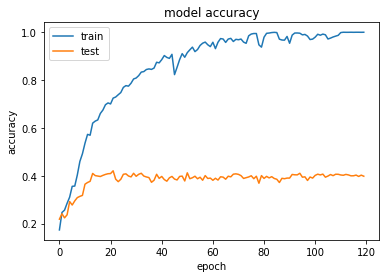

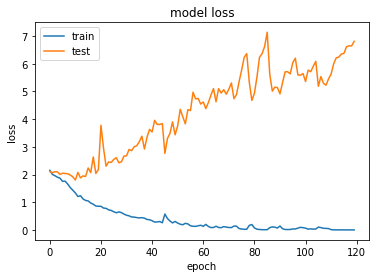

In [14]:
# summarize history for accuracy
plt.plot(model_mfcc.history['accuracy'])
plt.plot(model_mfcc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfcc.history['loss'])
plt.plot(model_mfcc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Avg Test accuracy and Standart Devision 

In [16]:
train_hist = pd.DataFrame(model_mfcc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.152381,0.173816,2.108342,0.218757
1,2.007630,0.246721,2.066146,0.241200
2,1.958151,0.256501,2.102536,0.224191
3,1.903562,0.284952,2.095467,0.236948
4,1.868201,0.310736,2.003201,0.292228
...,...,...,...,...
115,0.002586,0.999111,6.371942,0.399953
116,0.002054,0.999333,6.608174,0.402788
117,0.002000,0.999333,6.644601,0.397118
118,0.001974,0.999111,6.641003,0.402551


In [17]:
print(train_hist["val_accuracy"].describe())

count    120.000000
mean       0.385003
std        0.037015
min        0.218757
25%        0.386133
50%        0.395464
75%        0.402197
max        0.420742
Name: val_accuracy, dtype: float64


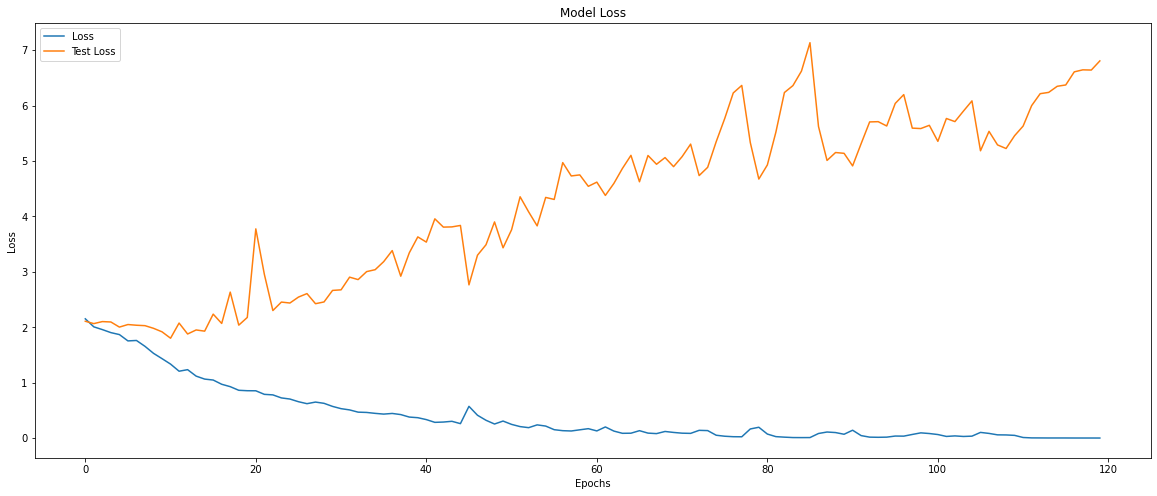

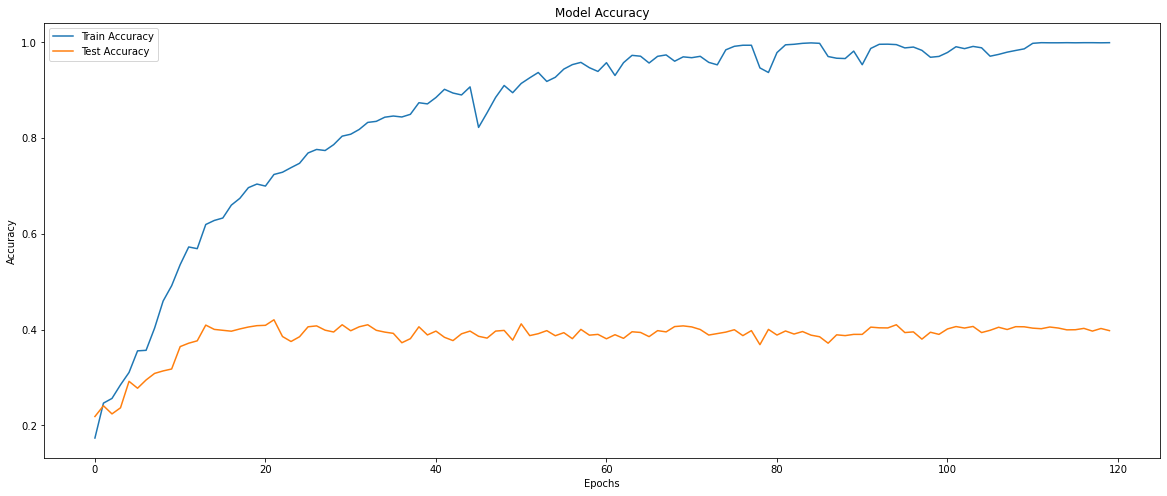

In [18]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[122   1  38  28  13  67   0  79  38 114]
 [  2 141   4   6  12   1   0  11  13  31]
 [ 17   3 185 120  15  22  16   2  60  60]
 [ 13   8  69 268  26   4  10   3  57  42]
 [ 10  24  35  86 124  32  15  84  19  71]
 [ 46  27  31  49  15 224   0  18  30  43]
 [  2   1  28  37   1   1  96   0  10   8]
 [  4  46  23  19 158   7   2 118  24  51]
 [ 13  20  26 102  10   3   4   7 181  27]
 [ 51  18  43  37  47  16   5  32  25 226]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.44      0.24      0.31       500
           1       0.49      0.64      0.55       221
           2       0.38      0.37      0.38       500
           3       0.36      0.54      0.43       500
           4       0.29      0.25      0.27       500
           5       0.59      0.46      0.52       483
           6       0.65      0.52      0.58       184
           7       0.33      0.26      0.29       452
           8       0.40      0.